# Gaussian Elimination

Gaussian elimination is an algorithm for solving  a linear system by matrix operations. You will write code that performs Gaussian elimination on a solvable system and returns the solution. First, we work through an instructive example.

$$
\begin{aligned}
x + 2y - z &= 1 \\
2x - y + 3z &= 5 \\
3x + y + 3z &= 10
\end{aligned}
$$
Now, we'll solve this system using reduced row echelon form (RREF).

### Step 1: Write the Augmented Matrix

The augmented matrix for this system is:
$$
\begin{pmatrix}
1 & 2 & -1 & \vert & 1 \\
2 & -1 & 3 & \vert & 5 \\
3 & 1 & 3 & \vert & 10
\end{pmatrix}
$$
### Step 2: Apply Row Operations to Achieve RREF

We'll perform row operations to transform the matrix into reduced row echelon form (RREF).

1. **Make the pivot in the first row (top-left corner) a 1.**  
   This is already 1, so no changes are needed.

2. **Make the first column below the pivot zeros.**
   - Add -2 times the first row to the second row:
     $R_2 \rightarrow R_2 - 2R_1$
     
     $$
     \begin{pmatrix}
     1 & 2 & -1 & \vert & 1 \\
     0 & -5 & 5 & \vert & 3 \\
     3 & 1 & 3 & \vert & 10
     \end{pmatrix}
     $$
     
   - Add -3 times the first row to the third row:
     $R_3 \rightarrow R_3 - 3R_1$
  
     
     $$
     \begin{pmatrix}
     1 & 2 & -1 & \vert & 1 \\
     0 & -5 & 5 & \vert & 3 \\
     0 & -5 & 6 & \vert & 7
     \end{pmatrix}
     $$

3. **Make the pivot in the second row a 1.**
   - Divide the second row by -5:
     $R_2 \rightarrow \frac{1}{-5}R_2$
     $$\begin{pmatrix}
     1 & 2 & -1 & \vert & 1 \\
     0 & 1 & -1 & \vert & -\frac{3}{5} \\
     0 & -5 & 6 & \vert & 7
     \end{pmatrix}
     $$

4. **Make the second column below the pivot zeros.**
   - Add 5 times the second row to the third row:
     $R_3 \rightarrow R_3 + 5R_2$
     
     $$\begin{pmatrix}
     1 & 2 & -1 & \vert & 1 \\
     0 & 1 & -1 & \vert & -\frac{3}{5} \\
     0 & 0 & 1 & \vert & \frac{2}{5}
     \end{pmatrix}
     $$
     
5. **Make the third column above the pivot zeros.**
   - Add 1 times the third row to the second row:
     $R_2 \rightarrow R_2 + 1R_3$

     $$\begin{pmatrix}
     1 & 2 & -1 & \vert & 1 \\
     0 & 1 & 0 & \vert & -\frac{1}{5} \\
     0 & 0 & 1 & \vert & \frac{2}{5}
     \end{pmatrix}
     $$
   - Add 1 times the third row to the first row:
     $R_1 \rightarrow R_1 + 1R_3$
  
     
     $$\begin{pmatrix}
     1 & 2 & 0 & \vert & \frac{7}{5} \\
     0 & 1 & 0 & \vert & -\frac{1}{5} \\
     0 & 0 & 1 & \vert & \frac{2}{5}
     \end{pmatrix}
     $$

7. **Make the second column above the pivot zeros.**
   - Add -2 times the second row to the first row:
     $R_1 \rightarrow R_1 - 2R_2$
     
     $$
     \begin{pmatrix}
     1 & 0 & 0 & \vert & 2 \\
     0 & 1 & 0 & \vert & -\frac{1}{5} \\
     0 & 0 & 1 & \vert & \frac{2}{5}
     \end{pmatrix}
     $$

### Step 3: Extract the solution

The system has a unique solution, given by the final column.

$$
x = 2, \quad y = -\frac{1}{5}, \quad z = \frac{2}{5}
$$


## Coding

Write a method `system_solve(A,b)` that solves the linear system **Ax = b** using Gaussian elimination. You may assume the solution exists and is unique. **A** should be an $n \times n$ coefficient matrix and **b** is an $n \times 1$ column vector. Some example input is given for you.

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.dpi'] = 300 ## for high-dpi displays. edit as needed

In [3]:
A = np.array([[1,2,-1],[2,-1,3],[3,1,3]], np.float64)
b = np.array([[1,3,10]], np.float64).T

## The following line creates the augmented matrix $(A | b)$. You should use this in your method
AA= np.hstack([A,b])
AA

array([[ 1.,  2., -1.,  1.],
       [ 2., -1.,  3.,  3.],
       [ 3.,  1.,  3., 10.]])

In [4]:
## Your code goes here. Insert cells as needed.
def system_solve(A, b):
    AA = np.hstack([A, b]);
    for c in range(len(A)):
        div = AA[c][c]
        if div == 0:
            for temp in range(c + 1, len(A)):
                if AA[temp][c] != 0:
                    AA[temp], AA[c] = AA[c], AA[temp]
                    break
            else:
                raise ValueError("Empty Column")
        AA[c, : ] = AA[c, : ] / div
        for r in range(len(A)):
            mult = AA[r][c]
            if r == c:
                continue
            AA[r, : ] -= AA[r][c] * AA[c, : ]
    return np.vstack(AA[: ,-1])

The following cell will check your code on 10 random 5x5 matrices

In [5]:
for i in range(10):
    A = np.random.rand(5,5)*10
    x = np.random.rand(5,1)*10
    b = A@x
    assert((np.abs(system_solve(A,b)-x)<1e-10).all())

## Measuring Error

The Gaussian Elimination algorithm has an error that increases with the size of the input matrix. In this section you will approximate the rate at which that error grows. Assume the error can be modeled by a polynomial $$ err(N) \sim N^k $$

where $N$ is the number of unknowns in the linear system and $k$ is a constant to be determined. It should be noted that in general the error term depends on the relative sizes of the elements in the coefficient matrix. We are choosing them to be random from $[0,1]$ so they will usually behave reasonably the same and so the problem is simplified in our case.

### Approach

You will calculate the error in your linear system solver on several systems up to size $N=1000$. For each size $N$ you will solve 10 random systems and average the error $e(N)$ over the 25 runs. You will then find a polynomial fit for the dataset $N$ vs. $e(N)$.

Write a method that takes as parameters the matrix size $N$ and the number of repetitions to compute. Create two random uniform matrices: $A$ and $x$ (uniformly random over $[0,1]$, by using `np.random.rand`. Compute $b = Ax$. Use your linear solver to find $\tilde{x}$ given $A,b$ and determine the length of the error vector $x - \tilde{x}$. Do this for each repetition and return the *median* error (length of the error vector). We are using the **median** instead of the mean because the mean is too sensitive to outliers and this investigation is rife with outliers!

In [6]:
## Your code goes here. Insert cells as needed.
def error_calculation(N, rep):
    print(N, end='\n\t')
    error = []
    times = []
    for i in range(rep):
        A = [[np.random.rand() for i in range(N)] for j in range(N)]
        x = np.vstack([np.random.rand() for i in range(N)])
        b = A @ x
        start = time.time()
        _x = system_solve(A, b)
        e = x - _x
        error.append(np.linalg.norm(e))
        times.append(time.time() - start)
        print(i, end=" ")
    print()
    return error[rep // 2], times[rep // 2]

Now collect data on various values of $N$ up to 1000. Be judicious: this problem takes a while to solve for large matrices. You should end up with a vector $X$ that contains matrix sizes ($N$) up to 1000 and $Y$ that contains the average error $e(N)$.

In [14]:
## Your code goes here. Insert cells as needed.
#starts at 2 to make log plotting nicer
n = range(2, 1002, 20)
en, t = map(list, zip(*[error_calculation(i, 10) for i in n]))
n, en, t

2
	0 1 2 3 4 5 6 7 8 9 
22
	0 1 2 3 4 5 6 7 8 9 
42
	0 1 2 3 4 5 6 7 8 9 
62
	0 1 2 3 4 5 6 7 8 9 
82
	0 1 2 3 4 5 6 7 8 9 
102
	0 1 2 3 4 5 6 7 8 9 
122
	0 1 2 3 4 5 6 7 8 9 
142
	0 1 2 3 4 5 6 7 8 9 
162
	0 1 2 3 4 5 6 7 8 9 
182
	0 1 2 3 4 5 6 7 8 9 
202
	0 1 2 3 4 5 6 7 8 9 
222
	0 1 2 3 4 5 6 7 8 9 
242
	0 1 2 3 4 5 6 7 8 9 
262
	0 1 2 3 4 5 6 7 8 9 
282
	0 1 2 3 4 5 6 7 8 9 
302
	0 1 2 3 4 5 6 7 8 9 
322
	0 1 2 3 4 5 6 7 8 9 
342
	0 1 2 3 4 5 6 7 8 9 
362
	0 1 2 3 4 5 6 7 8 9 
382
	0 1 2 3 4 5 6 7 8 9 
402
	0 1 2 3 4 5 6 7 8 9 
422
	0 1 2 3 4 5 6 7 8 9 
442
	0 1 2 3 4 5 6 7 8 9 
462
	0 1 2 3 4 5 6 7 8 9 
482
	0 1 2 3 4 5 6 7 8 9 
502
	0 1 2 3 4 5 6 7 8 9 
522
	0 1 2 3 4 5 6 7 8 9 
542
	0 1 2 3 4 5 6 7 8 9 
562
	0 1 2 3 4 5 6 7 8 9 
582
	0 1 2 3 4 5 6 7 8 9 
602
	0 1 2 3 4 5 6 7 8 9 
622
	0 1 2 3 4 5 6 7 8 9 
642
	0 1 2 3 4 5 6 7 8 9 
662
	0 1 2 3 4 5 6 7 8 9 
682
	0 1 2 3 4 5 6 7 8 9 
702
	0 1 2 3 4 5 6 7 8 9 
722
	0 1 2 3 4 5 6 7 8 9 
742
	0 1 2 3 4 5 6 7 8 9 
762
	0 1 2 3 4 5 6

(range(2, 1002, 20),
 [np.float64(0.0),
  np.float64(7.448245854376596e-14),
  np.float64(1.0925772548808438e-12),
  np.float64(1.6095366348881064e-11),
  np.float64(1.066120925829146e-11),
  np.float64(1.418486798851181e-11),
  np.float64(1.3084462989094781e-11),
  np.float64(2.931047629131231e-12),
  np.float64(1.5251979271170078e-11),
  np.float64(8.460779733003733e-12),
  np.float64(1.1241357310535192e-11),
  np.float64(3.447145246058146e-11),
  np.float64(3.945636140208988e-10),
  np.float64(2.57670776272454e-10),
  np.float64(1.5219244073354115e-11),
  np.float64(1.309912606382775e-10),
  np.float64(1.7325164970697893e-11),
  np.float64(1.9728123745547465e-10),
  np.float64(3.594956930492443e-10),
  np.float64(3.705231930529445e-10),
  np.float64(3.773569912245557e-11),
  np.float64(1.4952339438120957e-10),
  np.float64(4.671066919876344e-09),
  np.float64(9.417091275679945e-11),
  np.float64(8.213761831943842e-10),
  np.float64(2.6011997595992973e-10),
  np.float64(1.70678274709

Now create a scatter plot of $N$ vs $e(N)$. An example plot is shown here
![scatterplot](./error-scatterplot.png).

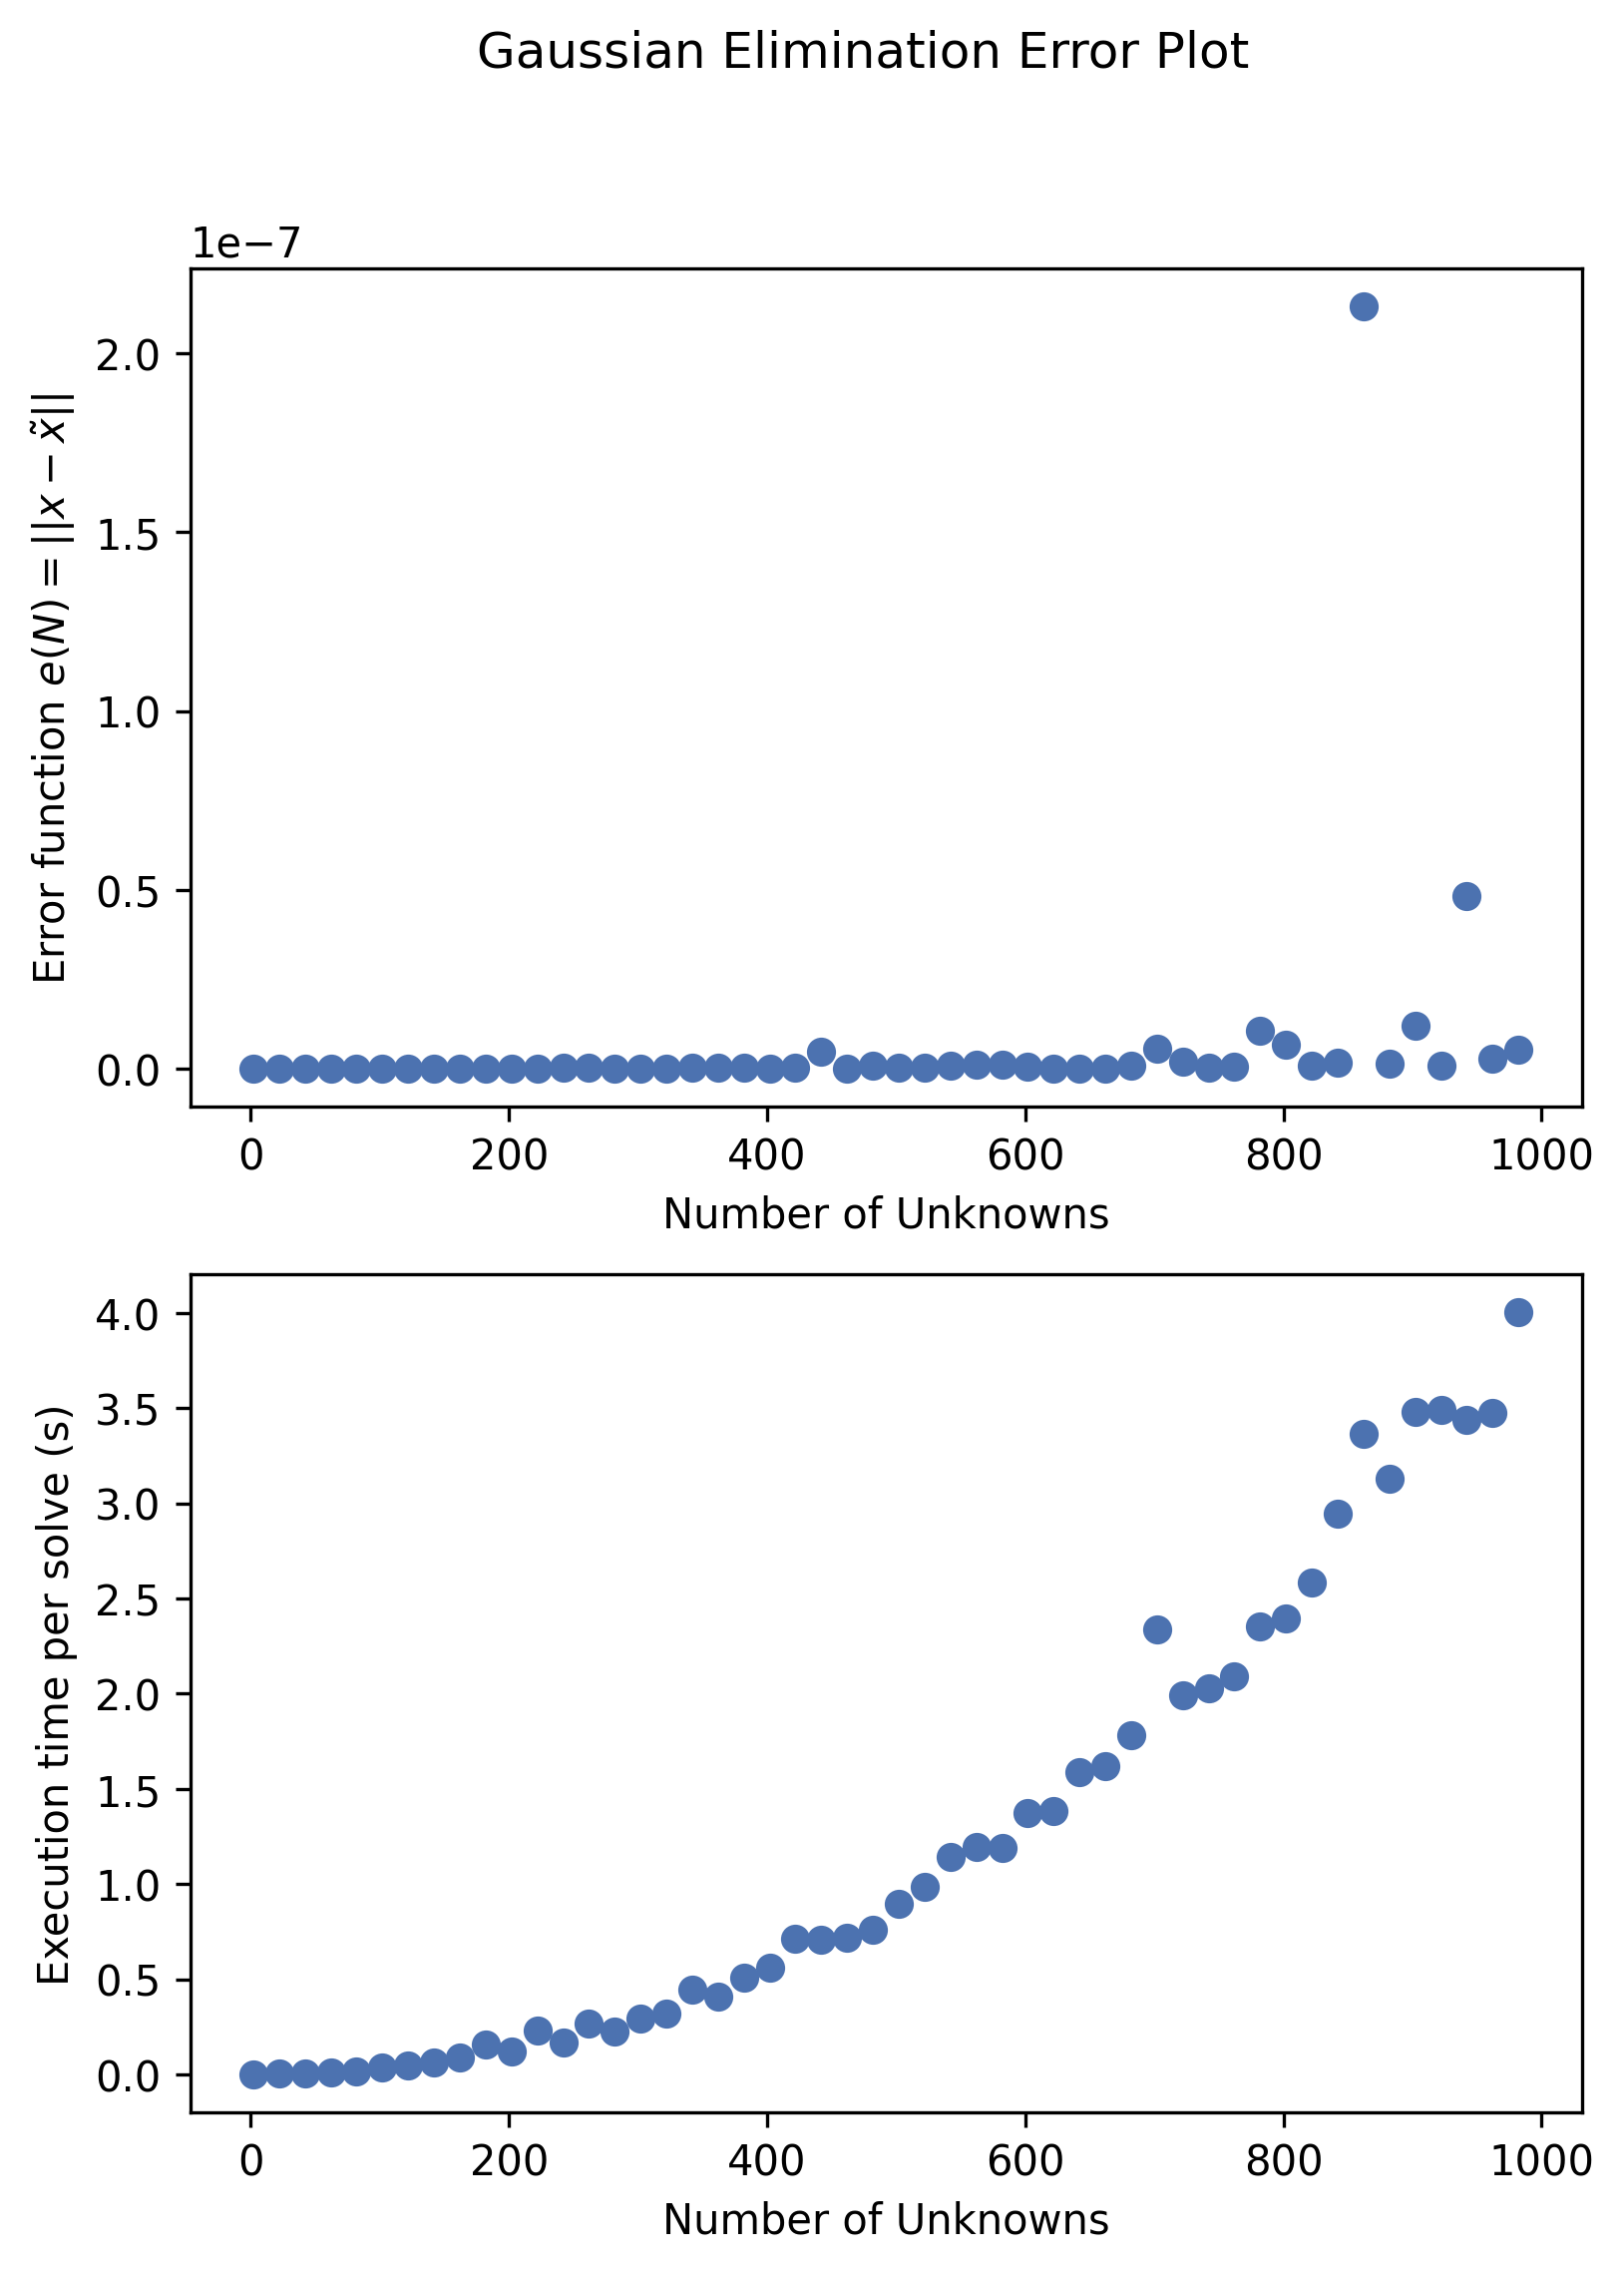

In [20]:
## Your code goes here. Insert cells as needed.
plt.style.use("seaborn-v0_8-deep")
fig, (eplot, tplot) = plt.subplots(2, 1, figsize=(6, 8))

fig.suptitle("Gaussian Elimination Error Plot")
eplot.set_xlabel("Number of Unknowns")
eplot.set_ylabel("Error function $e(N) = ||x-\\tilde{x}||$")
eplot.scatter(n, en, label='error');
tplot.set_xlabel("Number of Unknowns")
tplot.set_ylabel("Execution time per solve (s)")
tplot.scatter(n, t, label='execution time');


## Regression

You have written a regression routine before, but we will use some built into numpy. Here's sample code for doing a quadratic regression
```python
x = # x data as numpy array or python list
y = # y data as numpy array or python list
coefficients = np.polyfit(x, y, 2)  # 2 indicates quadratic
a2, a1, a0 = coefficients # in decreasing order of powers
quadratic_model = np.poly1d(coefficients) # make a2x^2 + a1x + a0
y_fit = quadratic_model(x) # now y_fit is a vector
```

First you should compute a quadratic regression and superimpose the resulting parabola on a scatterplot of the data

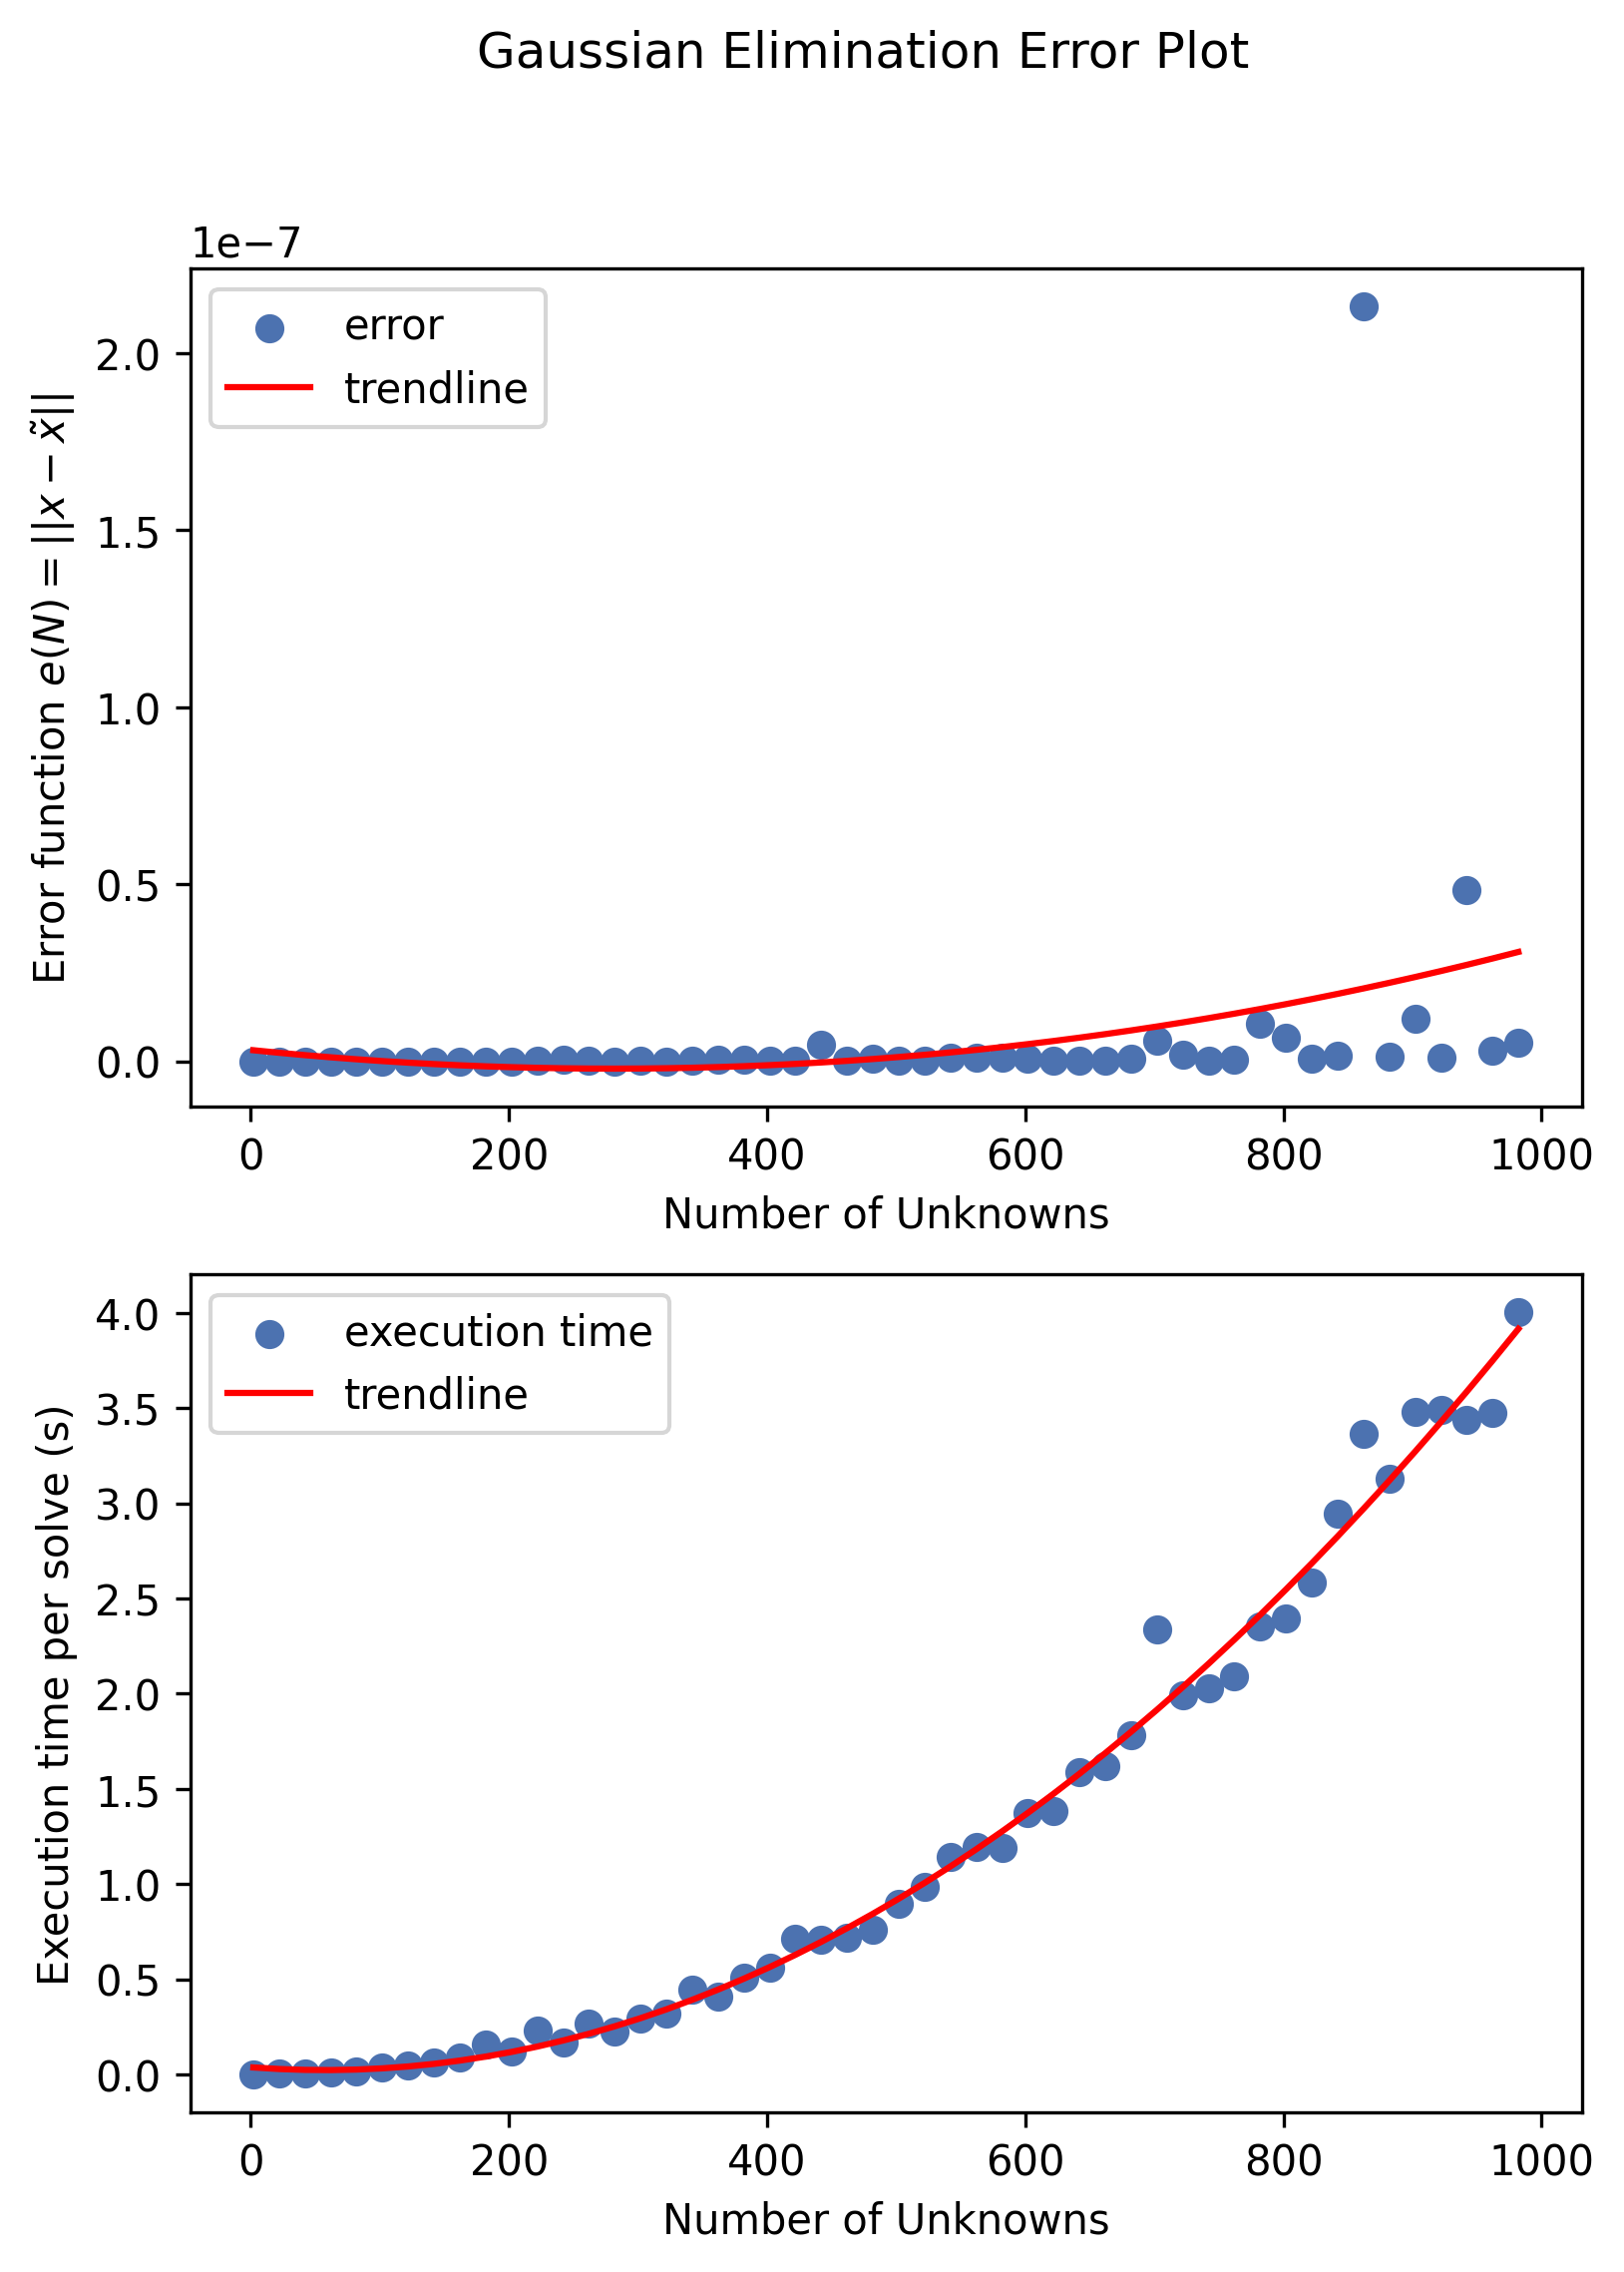

In [21]:
## Your code goes here. Insert cells as needed.
#x = n
#y = en
fig, (eplot, tplot) = plt.subplots(2, 1, figsize=(6, 8))

fig.suptitle("Gaussian Elimination Error Plot")
eplot.set_xlabel("Number of Unknowns")
eplot.set_ylabel("Error function $e(N) = ||x-\\tilde{x}||$")
eplot.scatter(n, en, label='error');
tplot.set_xlabel("Number of Unknowns")
tplot.set_ylabel("Execution time per solve (s)")
tplot.scatter(n, t, label='execution time');

coefs = np.polyfit(n, en, 2)
a2, a1, a0 = coefs
quadratic_model = np.poly1d(coefs)
e_fit = quadratic_model(n)
eplot.plot(n, e_fit, color='red', label='trendline')
eplot.legend()

coefs = np.polyfit(n, t, 2)
a2, a1, a0 = coefs
quadratic_model = np.poly1d(coefs)
t_fit = quadratic_model(n)
tplot.plot(n, t_fit, color='red', label='trendline')
tplot.legend()
plt.show()

### A regression problem and a solution

Depending on your data the parabola you've plotted may or may not look like a decent fit. But it has one glaring problem. By finding a quadratic fit we are assuming $O(N^2)$ growth of our error term. But it could be $O(n^3)$ or $O(n^{2.3})$. What we want to find is the best **exponent** $O(n^k)$ for polynomial growth. This is the perfect time to use a log-log plot. If you transform your data $x_{log} = \log(x)$ and $y_{log} = \log(y)$ and perform a linear fit, the slope of the best fit line tells you the order of growth $k$ (derivation of this is discussed in class.)

You should find the best log-log plot slope. Then make a scatter plot of the values `x_log` and `y_log` along with the best fit line. Above the graph print the coefficients of the plot and state your best estimate of the growth rate $err(N) \sim N^k$

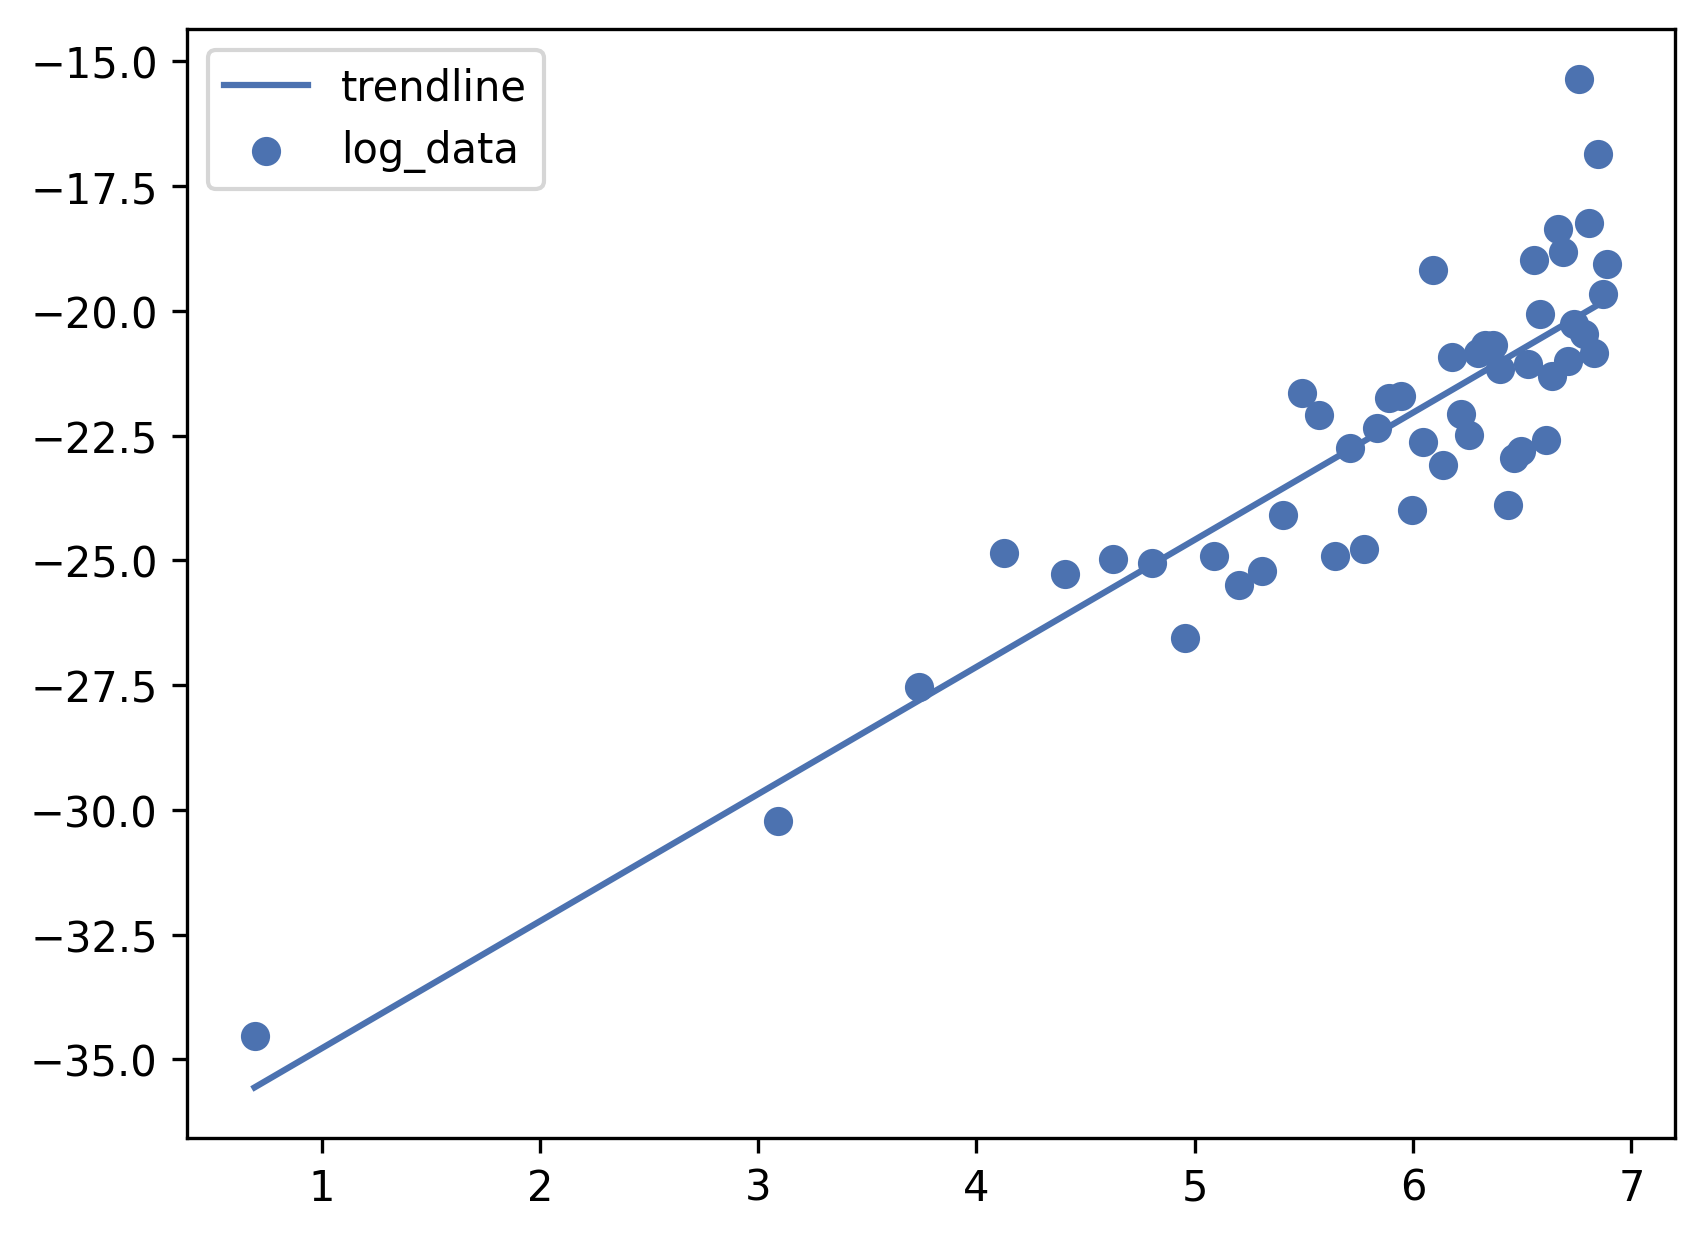

In [22]:
import math
plt.clf()
## Your code goes here. Insert cells as needed.
x = n
x_log = np.array([math.log(i) for i in n])
e_log = np.array([math.log(max(i, 1e-15)) for i in en])
ae, be = np.polyfit(x_log, e_log, 1)
e_pred = ae * x_log + be
plt.plot(x_log, e_pred, label="trendline")
plt.scatter(x_log, e_log, label="log_data")
plt.legend()
plt.show()

C = 6.130881340469183e-17
k = 2.5486387731403464


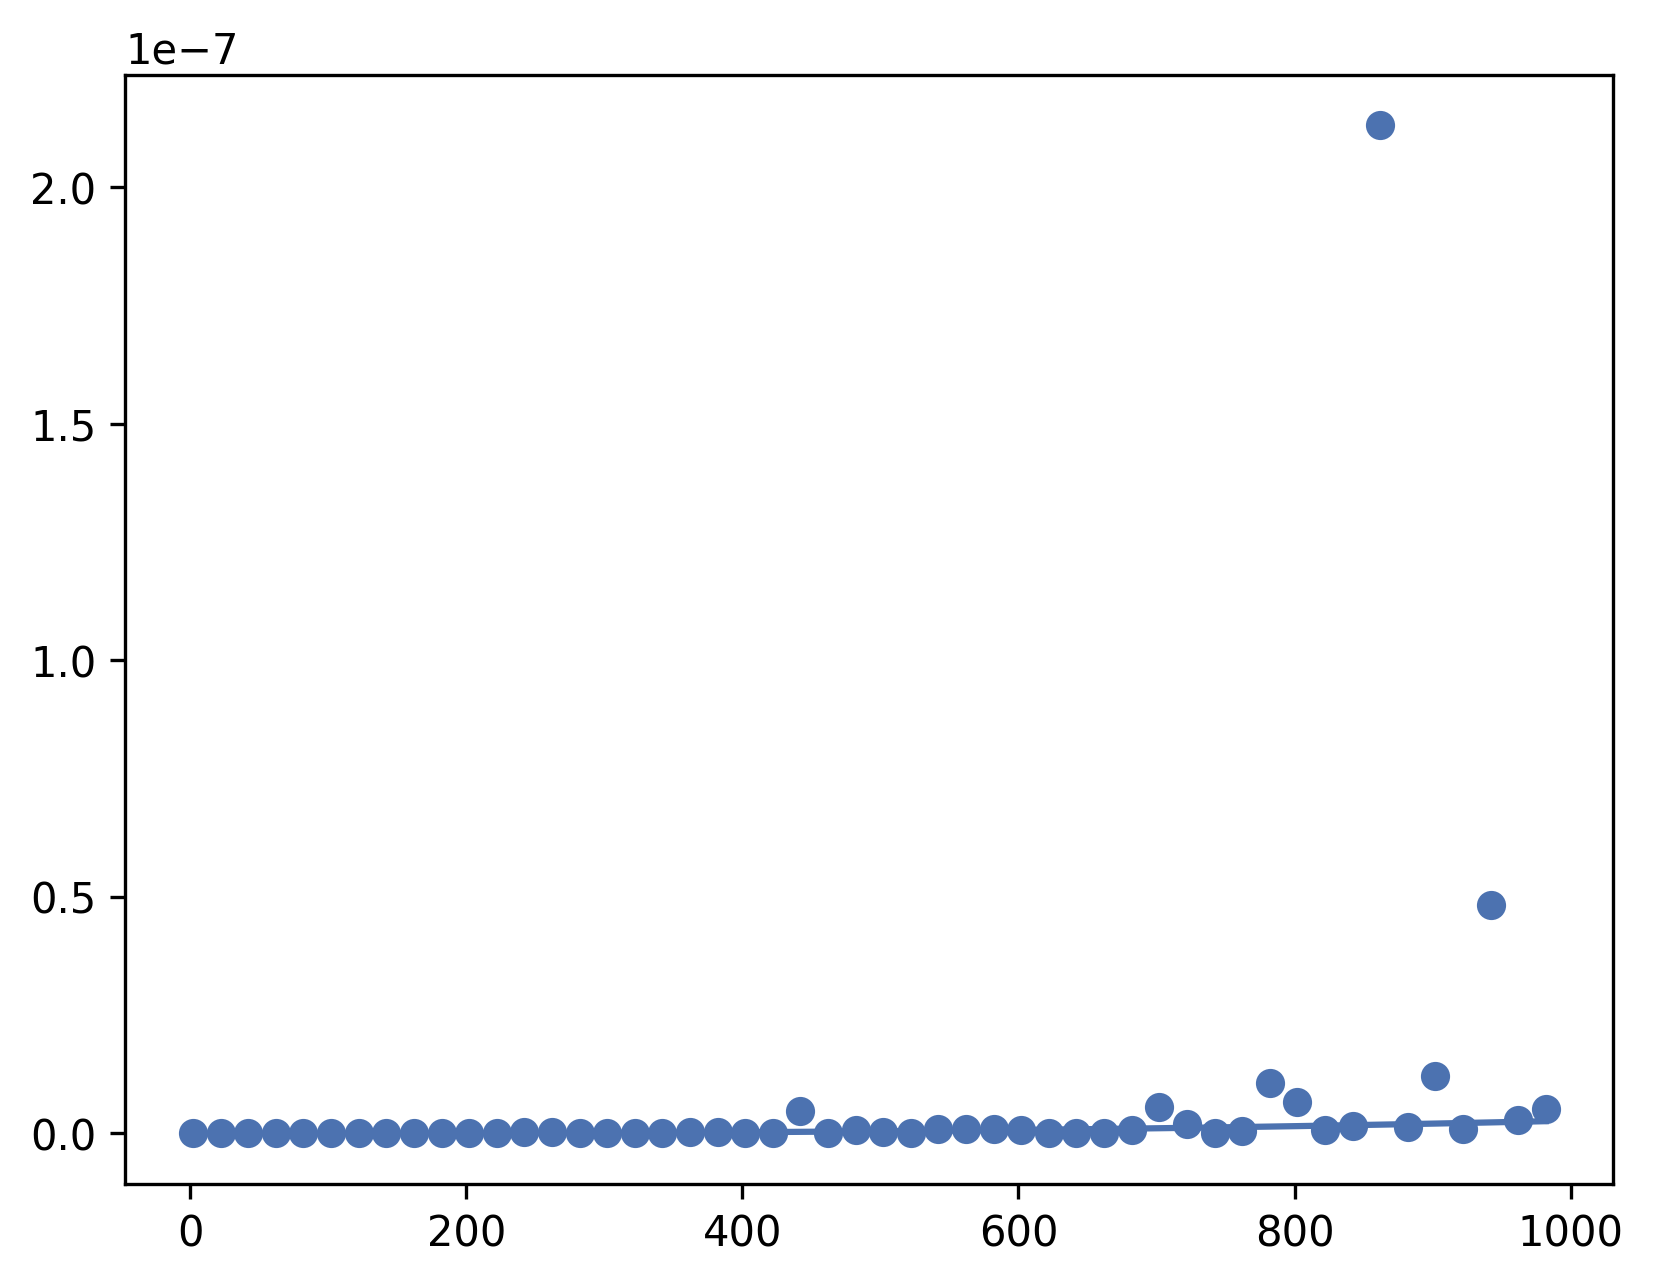

In [23]:
C = math.exp(be)
k = ae
print(f"C = {C}")
print(f"k = {k}")

plt.clf();
e_pred = [C * (i ** k) for i in x]
plt.plot(x, e_pred)
plt.scatter(x, en);

Finally, find the correlation coefficient for `x_log` and `y_log`. What amount of the variance is explained by your linear model? (There are several built in methods than can find this value)

In [24]:
## Your code goes here. Insert cells as needed.
r = np.corrcoef(x_log,e_log)[1,0]
r

np.float64(0.887367768567698)

Around 90% of the variance is explained by the linear model, showing the error does grow as a polynomial.